# Caso #3 - 2021-II BCD7214 Administración de datos
## Estudiantes: <font color='green'>Aguilar, William. & Vargas, Rachit.

<img src=https://biblioteca.ulead.ac.cr/sites/default/files/LEAD%20color.png  width="220"></img>



---



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/data.csv', sep=';', error_bad_lines=False)
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [3]:
class Analisis_Data():

  """ Se crea una clase para poder manejar los comandos de manera mas efectiva y rapida, a la vez que se reuti -
  liza el codigo normalmente repetitivo """
  
  def __init__(self, datos):
    self.__datos = datos
  
  @property 
  def datos(self):
    return self.__datos

  @datos.setter
  def datos(self, datos):
    self.__datos = datos
  
  def head(self, cantidad_registros=5): 
    return self.__datos.head(cantidad_registros)

  def tail(self, cantidad_registros=5):
    return self.__datos.tail(cantidad_registros)

  def delete_column_dinamic(self, percent_up=0.9):
    columns = self.__datos.columns
    i = 0
    for col in columns:
      valor = np.mean(self.__datos[col].isnull()[i])
      if valor >= percent_up:
        del self.__datos[col]
      i+=1;

  def delete_column(self, col_del): # ESTE COMANDO ELIMINA LA COLUMNA QUE QUERAMOS DE MODO MANUAL
    del self.__datos[col_del]

  def data_types(self):
    print('TIPOS DE DATOS POR COLUMNA:\n')
    return self.__datos.dtypes

  def __display_data_null(self):
    plt.figure(figsize=(10,5), dpi=100)
    sns.heatmap(self.__datos.isnull(), cbar=False, cmap='OrRd')
    plt.gca().update(dict(title='Null values - Heatmap', xlabel='Variables', ylabel='Index'))
    plt.show()

  def data_null(self):
    self.__display_data_null()
    print('VALORES NULOS POR COLUMNAS:\n')
    print(self.__datos.isnull().sum())
  
  def data_null_percent(self):
    return np.mean(self.__datos.isnull()*100)
  
  def replace_values(self, to_replace, value, columns=[]):
    self.__datos[columns] = self.__datos[columns].replace(to_replace, value)
  
  def del_row_null(self, thresh=3):
    self.__datos = self.__datos.dropna(thresh=thresh)
  
  def save_csv(self, file_name='data.csv', index=False):
    self.__datos.to_csv(file_name, index=index)
  
analisis = Analisis_Data(df) # INSTANCIA DE LA CLASE CREADA

### Mostrando los primeros 5 registros del dataframe

In [4]:
analisis.head(cantidad_registros=5)

,id,firstname,lastname,gender,birthday,status,salary,taxes,department,hourlyrate,maritalstatus,overtime
0,1,Kimberley,Kuhic,F,15/5/90,--,110182.0,NaN,Sales,40,Single,Yes
1,1,Kitty,Ruecker,F,24/7/76,PE,90613.0,NaN,Sales,76,Married,No
2,5,Jamal,Cole,M,31/1/83,PE,109251.0,NaN,Research & Development,89,Single,Yes
3,5,Christopher,D'Amore,F,16/3/74,PE,103614.0,NaN,Sales,78,Married,No
4,5,Carly,Ratke,M,16/1/98,PE,88315.0,NaN,Research & Development,86,Single,Yes


### Mostrando los últimos 5 registros del dataframe

In [5]:
analisis.tail(cantidad_registros=5)

,id,firstname,lastname,gender,birthday,status,salary,taxes,department,hourlyrate,maritalstatus,overtime
995,996,Linnie,Larson,F,4/3/80,PE,92815.0,NaN,Research & Development,92,Single,Yes
996,997,Agusta,Emmerich,M,5/12/72,PE,114085.0,NaN,Research & Development,91,Divorced,No
997,997,Andrew,Schulist,F,2/1/71,PE,101940.0,NaN,Research & Development,34,Single,No
998,997,Brook,Turner,M,21/6/90,NaN,80734.0,NaN,Research & Development,49,Married,No
999,999,Maceo,Wisoky,M,12/11/83,PE,142838.0,NaN,Human Resources,33,Married,No


### Mostrando los tipos de datos por columna

In [6]:
analisis.data_types()

TIPOS DE DATOS POR COLUMNA:



id                 int64
firstname         object
lastname          object
gender            object
birthday          object
status            object
salary           float64
taxes             object
department        object
hourlyrate        object
maritalstatus     object
overtime          object
dtype: object

### Mostrando valores nulos por columnas

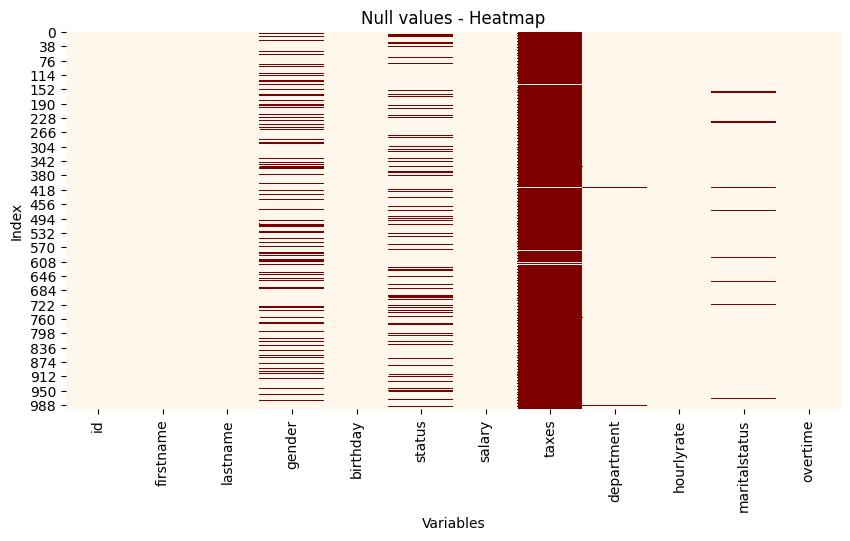

VALORES NULOS POR COLUMNAS:

id                 0
firstname          2
lastname           2
gender           207
birthday           2
status           178
salary             2
taxes            993
department        12
hourlyrate         2
maritalstatus     25
overtime           2
dtype: int64


In [7]:
analisis.data_null()

### Mostrando valores nulos por columnas en %

In [8]:
analisis.data_null_percent()

id                0.0
firstname         0.2
lastname          0.2
gender           20.7
birthday          0.2
status           17.8
salary            0.2
taxes            99.3
department        1.2
hourlyrate        0.2
maritalstatus     2.5
overtime          0.2
dtype: float64

### Eliminando los datos con valores nulos arriba o igual al 70%

In [9]:
analisis.delete_column_dinamic(percent_up=0.7)
analisis.head(cantidad_registros=5)

,id,firstname,lastname,gender,birthday,status,salary,department,hourlyrate,maritalstatus,overtime
0,1,Kimberley,Kuhic,F,15/5/90,--,110182.0,Sales,40,Single,Yes
1,1,Kitty,Ruecker,F,24/7/76,PE,90613.0,Sales,76,Married,No
2,5,Jamal,Cole,M,31/1/83,PE,109251.0,Research & Development,89,Single,Yes
3,5,Christopher,D'Amore,F,16/3/74,PE,103614.0,Sales,78,Married,No
4,5,Carly,Ratke,M,16/1/98,PE,88315.0,Research & Development,86,Single,Yes


### Eliminando las filas con elementos menores o igual a 2

In [10]:
print('Dimensiones sin la eliminacion de las filas: ' + str(analisis.datos.shape))
analisis.del_row_null(thresh=2)
print('Dimensiones con la eliminacion de las filas:' + str(analisis.datos.shape))

Dimensiones sin la eliminacion de las filas: (1000, 11)
Dimensiones con la eliminacion de las filas:(998, 11)


### Remplazando los String "--" por valores nulos

In [11]:
columnas = analisis.datos.columns
analisis.replace_values('--', np.nan, columnas)
analisis.head(cantidad_registros=5)

,id,firstname,lastname,gender,birthday,status,salary,department,hourlyrate,maritalstatus,overtime
0,1,Kimberley,Kuhic,F,15/5/90,NaN,110182.0,Sales,40,Single,Yes
1,1,Kitty,Ruecker,F,24/7/76,PE,90613.0,Sales,76,Married,No
2,5,Jamal,Cole,M,31/1/83,PE,109251.0,Research & Development,89,Single,Yes
3,5,Christopher,D'Amore,F,16/3/74,PE,103614.0,Sales,78,Married,No
4,5,Carly,Ratke,M,16/1/98,PE,88315.0,Research & Development,86,Single,Yes


### Remplazando los valores nulos de la variable <font color='blue'>Gender</font> por U


In [12]:
columna = ['gender']
analisis.replace_values(np.nan, 'U', columna)
analisis.datos.gender.unique()

array(['F', 'M', 'U'], dtype=object)

### Remplazando los valores nulos de la variable <font color='blue'>Departamento</font> por Bench

In [13]:
columna2 = ['department']
analisis.replace_values(np.nan, 'Bench', columna2)
analisis.datos.department.unique()

array(['Sales', 'Research & Development', 'Human Resources', 'Bench'],
      dtype=object)

### Remplazando los valores nulos de la variable <font color='blue'>hourlyrate</font> por la media

In [14]:
""" En este fragmento de codigo estamos cambiando la variable hourlyrate a tipo de dato numerico y nos estamos ayudando de una variable 
    llamada temp (temporal) """
                      
temp = analisis.datos
temp.hourlyrate = pd.to_numeric(temp.hourlyrate)
analisis.datos = temp

In [15]:
columna3 = ['hourlyrate']
analisis.replace_values(np.nan, analisis.datos.hourlyrate.median(), columna3)
analisis.datos.isnull().sum()

id                 0
firstname          0
lastname           0
gender             0
birthday           0
status           187
salary             0
department         0
hourlyrate         0
maritalstatus     23
overtime           0
dtype: int64

### Reemplazando los valores perdidos inesperados de la columna <font color='blue'>“Overtime”</font> por No

In [16]:
columna4 = ['overtime']
analisis.replace_values(to_replace=['0', '1'], value=np.nan, columns=columna4) #PRIMERO PASO LOS VALORES 1 Y 0 A NULOS
analisis.replace_values(to_replace=np.nan, value="No", columns=columna4) #LUEGO LOS VALORES NULOS LOS PASO A NO
analisis.datos.overtime.unique()

array(['Yes', 'No'], dtype=object)

### Guardando el DataFrame en formato .csv

In [17]:
analisis.save_csv(file_name='processed_data.csv', index=False)